In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [ ]:
pickle_file_link = "/content/drive/MyDrive/voice_dataset"
X_train = pickle.load(open(f"{pickle_file_link}/X_train.pickle", "rb"))
y_train = pickle.load(open(f"{pickle_file_link}/y_train.pickle", "rb"))

X_val = pickle.load(open(f"{pickle_file_link}/X_val.pickle", "rb"))
y_val = pickle.load(open(f"{pickle_file_link}/y_val.pickle", "rb"))

X_test = pickle.load(open(f"{pickle_file_link}/X_test.pickle", "rb"))
y_test = pickle.load(open(f"{pickle_file_link}/y_test.pickle", "rb"))

In [ ]:
# Create a model object
model = tf.keras.Sequential()

In [ ]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding =  "same",
                                 activation = "relu",
                                 input_shape =(128,128,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [ ]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding =  "same",
                                 activation = "relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding =  "same",
                                 activation = "relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [ ]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

In [ ]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [ ]:
# Add the output layer
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

In [ ]:
# Compile the model
model.compile(optimizer =  "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [ ]:
# Train the model for 50 epochs with batch size of 128
results = model.fit(X_train,y_train,
                    batch_size = 128,
                    epochs = 50,
                    validation_data = (X_val, y_val))

Epoch 1/50
55/55 [==============================] - 6s 99ms/step - loss: 2.2599 - accuracy: 0.1401 - val_loss: 2.1033 - val_accuracy: 0.3024
Epoch 2/50
55/55 [==============================] - 5s 93ms/step - loss: 2.0235 - accuracy: 0.2442 - val_loss: 1.6506 - val_accuracy: 0.4410
Epoch 3/50
55/55 [==============================] - 5s 92ms/step - loss: 1.8136 - accuracy: 0.3245 - val_loss: 1.4302 - val_accuracy: 0.5452
Epoch 4/50
55/55 [==============================] - 5s 93ms/step - loss: 1.6538 - accuracy: 0.3938 - val_loss: 1.2536 - val_accuracy: 0.5613
Epoch 5/50
55/55 [==============================] - 5s 93ms/step - loss: 1.5391 - accuracy: 0.4270 - val_loss: 1.1559 - val_accuracy: 0.6220
Epoch 6/50
55/55 [==============================] - 5s 93ms/step - loss: 1.4602 - accuracy: 0.4585 - val_loss: 1.0846 - val_accuracy: 0.6208
Epoch 7/50
55/55 [==============================] - 5s 92ms/step - loss: 1.3788 - accuracy: 0.4874 - val_loss: 1.0924 - val_accuracy: 0.6197
Epoch 8/50
55

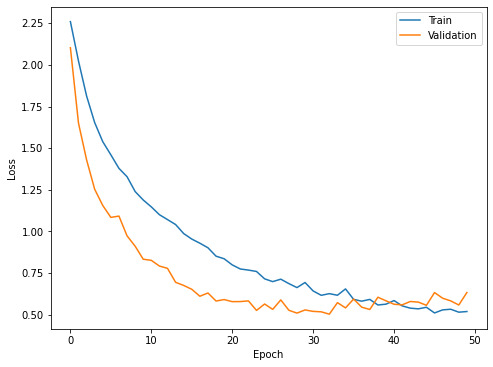

In [ ]:
#save model file
model.save('audio_model.h5')

# Plot the the training loss
plt.plot(results.history["loss"],label ="Train")

# Plot the the validation loss
plt.plot(results.history["val_loss"],label ="Validation")

# Name the x and y axises
plt.ylabel("Loss")
plt.xlabel("Epoch")

# Put legend table
plt.legend()

# Show the plot
plt.show()

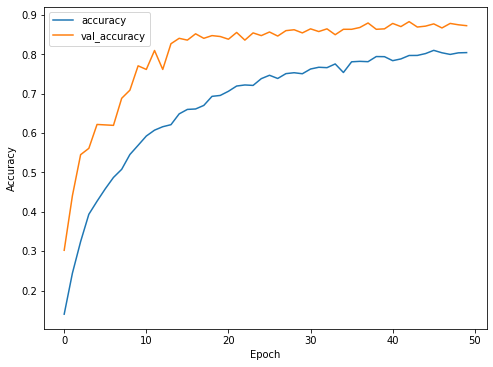

In [ ]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"],label ="accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"],label ="val_accuracy")

# Name the x and y axises
plt.ylabel("Accuracy")
plt.xlabel("Epoch")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Evaluate the performance
model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 14ms/step - loss: 0.7114 - accuracy: 0.8488


[0.7114077210426331, 0.8487972617149353]

In [ ]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[633].reshape(1,128,128,1))

# Print the prediction result
print(prediction_result)

[[1.8814845e-02 5.4874261e-05 4.5882430e-02 7.0982742e-06 1.2209005e-05
  1.9759308e-09 5.4297709e-15 2.2220448e-12 1.2354359e-07 9.3522841e-01]]


In [ ]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

In [ ]:
# Print the results
print(f"This sound spectogram belongs to class {predicted_class} with {predicted_probability} probability")

This sound spectogram belongs to class 9 with 0.9352284073829651 probability


In [ ]:
#importing required libraries
import os
import random
from pathlib import Path
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import cv2 as cv
import tensorflow as tf
from sklearn.preprocessing import minmax_scale

In [ ]:
#Testing sample path
sound_sample = '/content/drive/MyDrive/voice_dataset/Amma/2937-1-0-0.wav'

In [ ]:
#create spectogram function
test_sound_path = "/content/drive/MyDrive/voice_dataset"
import librosa
import librosa.display
def create_spectogram(filepath):
  global saving_path
  plt.rcParams["figure.figsize"] = [6.96, 5.2]
  plt.rcParams["figure.autolayout"] = True
  fig, ax = plt.subplots()
  y, sr = librosa.load(filepath)
  S = librosa.feature.melspectrogram(y=y)
  S_dB = librosa.power_to_db(S, ref=np.max)
  img = librosa.display.specshow(S_dB, sr=sr,  hop_length=256)
  fig.tight_layout()
  saving_path = f"{test_sound_path}/{Path(filepath).stem}.png"
  plt.savefig(saving_path)


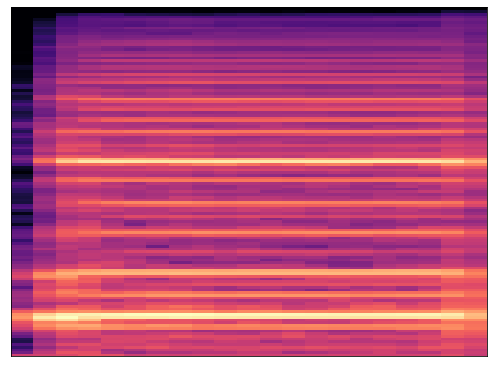

In [ ]:
create_spectogram(sound_sample)

In [ ]:
spectogram = cv.imread(saving_path, cv.IMREAD_COLOR)
spectogram = spectogram[10:360,14:491]
spectogram = cv.cvtColor(spectogram,cv.COLOR_BGR2GRAY)
spectogram = cv.resize(spectogram, (128,128))
spectogram =  minmax_scale(spectogram)
spectogram

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.055     , 0.055     ,
        0.055     ],
       [0.        , 0.        , 0.        , ..., 0.21      , 0.21      ,
        0.21      ],
       ...,
       [0.29943503, 0.29943503, 0.29943503, ..., 0.535     , 0.535     ,
        0.535     ],
       [0.37853107, 0.37853107, 0.37853107, ..., 0.55      , 0.55      ,
        0.55      ],
       [0.63276836, 0.63276836, 0.63276836, ..., 0.535     , 0.535     ,
        0.535     ]])

In [ ]:
# Make prediction on the reshaped sample
prediction_result = model.predict(spectogram.reshape(1,128,128,1))

# Print the prediction result
print(prediction_result)

[[1.9206220e-13 9.2188221e-01 6.7914283e-05 1.0471572e-18 4.6010191e-09
  1.1168341e-33 0.0000000e+00 1.2079986e-28 3.0774784e-22 7.8049950e-02]]


In [ ]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

In [ ]:
# Print the results
print(f"This sound spectogram belongs to class {predicted_class} with {predicted_probability} probability")

This sound spectogram belongs to class 1 with 0.9218822121620178 probability
